<a href="https://colab.research.google.com/github/arbiansyah10/2206074/blob/main/Gilang_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silakan unggah file gambar:


Saving pribadi.jpg to pribadi.jpg


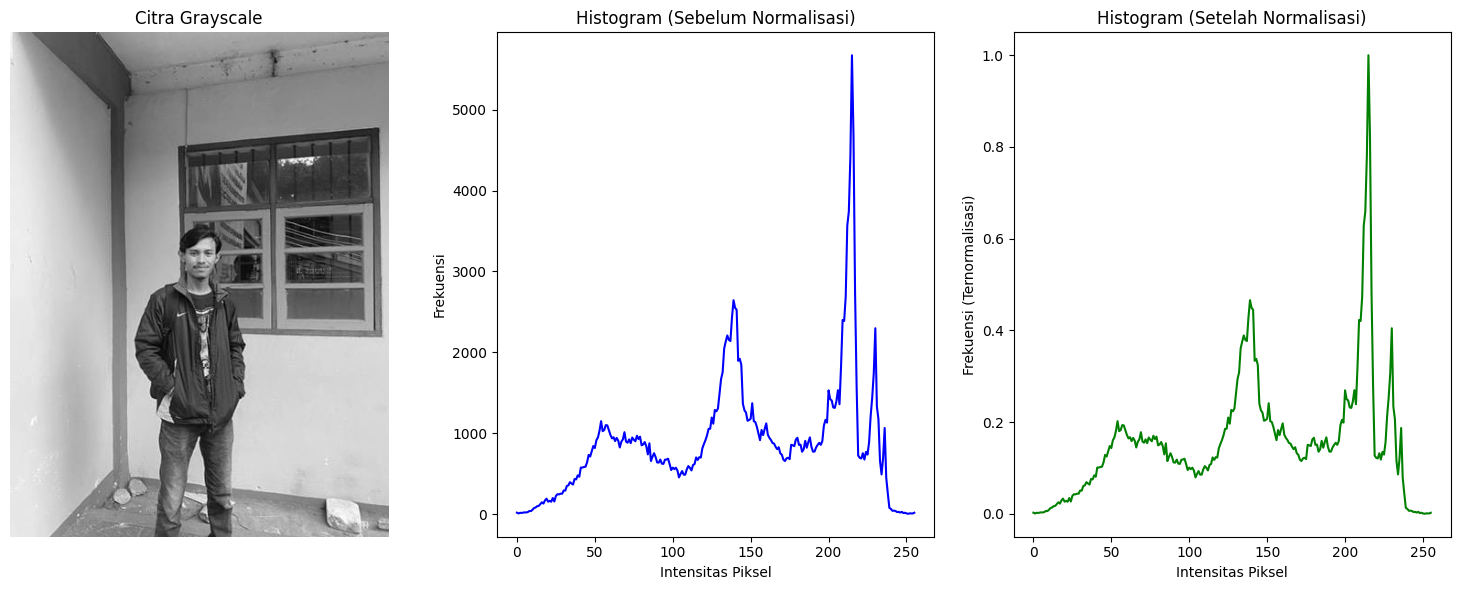

In [ ]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Unggah gambar ke Colab
print("Silakan unggah file gambar:")
uploaded = files.upload()

# Ambil nama file yang diunggah
image_path = list(uploaded.keys())[0]

# Membaca citra dalam mode grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dimuat
if image is None:
    print("Citra tidak ditemukan. Periksa kembali path-nya.")
else:
    # Menghitung histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalisasi histogram
    hist_normalized = cv2.normalize(hist, None, 0, 1, cv2.NORM_MINMAX)

    # Plot citra grayscale
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Citra Grayscale")
    plt.axis('off')

    # Plot histogram sebelum normalisasi
    plt.subplot(1, 3, 2)
    plt.plot(hist, color='blue')
    plt.title("Histogram (Sebelum Normalisasi)")
    plt.xlabel("Intensitas Piksel")
    plt.ylabel("Frekuensi")

    # Plot histogram setelah normalisasi
    plt.subplot(1, 3, 3)
    plt.plot(hist_normalized, color='green')
    plt.title("Histogram (Setelah Normalisasi)")
    plt.xlabel("Intensitas Piksel")
    plt.ylabel("Frekuensi (Ternormalisasi)")

    # Tampilkan semua plot
    plt.tight_layout()
    plt.show()


Silakan unggah file gambar:


Saving kotak.jpg to kotak.jpg


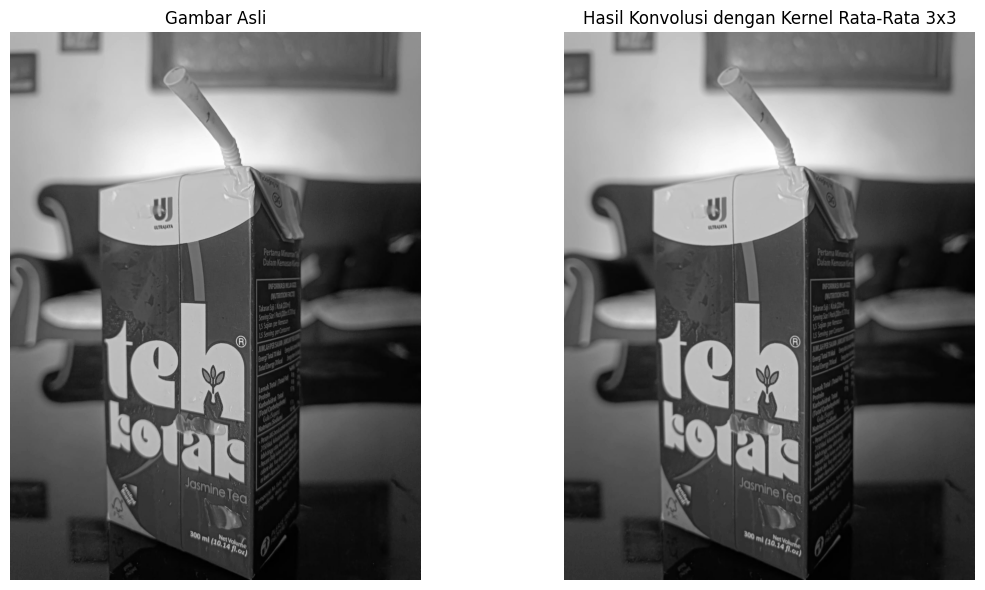

In [ ]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Unggah gambar ke Colab
print("Silakan unggah file gambar:")
uploaded = files.upload()

# Ambil nama file yang diunggah
image_path = list(uploaded.keys())[0]

# Membaca citra dalam mode grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dimuat
if image is None:
    print("Citra tidak ditemukan. Periksa kembali path-nya.")
else:
    # Membuat kernel rata-rata 3x3
    kernel = np.ones((3, 3), np.float32) / 9

    # Melakukan operasi konvolusi
    convolved_image = cv2.filter2D(image, -1, kernel)

    # Menampilkan gambar asli dan hasil konvolusi
    plt.figure(figsize=(12, 6))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Gambar Asli")
    plt.axis('off')

    # Gambar hasil konvolusi
    plt.subplot(1, 2, 2)
    plt.imshow(convolved_image, cmap='gray')
    plt.title("Hasil Konvolusi dengan Kernel Rata-Rata 3x3")
    plt.axis('off')

    # Tampilkan semua plot
    plt.tight_layout()
    plt.show()


Silakan unggah file gambar:


Saving IMG_20230817_071125.jpg to IMG_20230817_071125.jpg


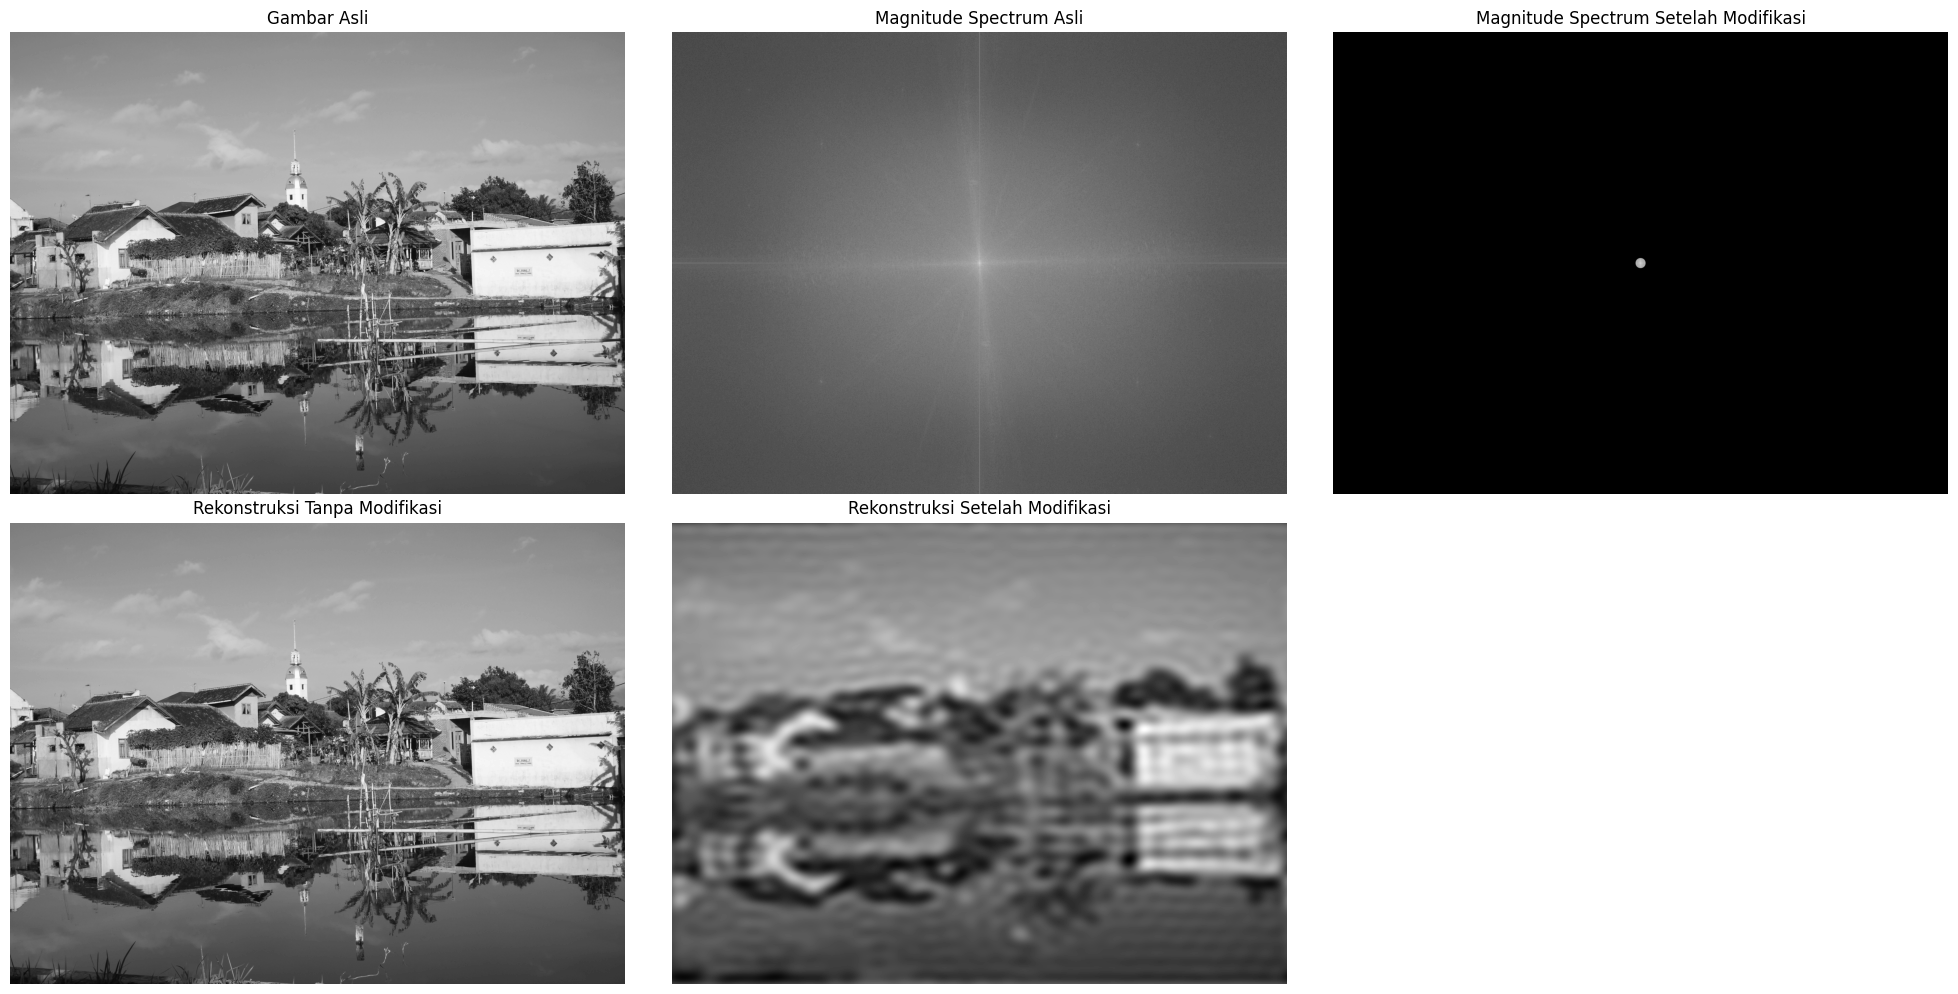

In [ ]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Unggah gambar ke Colab
print("Silakan unggah file gambar:")
uploaded = files.upload()

# Ambil nama file yang diunggah
image_path = list(uploaded.keys())[0]

# Membaca citra dalam mode grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dimuat
if image is None:
    print("Citra tidak ditemukan. Periksa kembali path-nya.")
else:
    # Transformasi Fourier
    f_transform = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f_transform)

    # Magnitude spectrum asli
    magnitude_spectrum = 20 * np.log(np.abs(f_shifted) + 1)

    # Modifikasi: Hilangkan frekuensi tinggi
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Koordinat tengah
    mask = np.zeros((rows, cols), np.uint8)
    radius = 30  # Radius frekuensi rendah yang ingin disimpan
    cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)
    f_shifted_modified = f_shifted * mask  # Terapkan mask

    # Magnitude spectrum setelah modifikasi
    magnitude_spectrum_modified = 20 * np.log(np.abs(f_shifted_modified) + 1)

    # Invers Transformasi Fourier
    f_inverse_shifted = np.fft.ifftshift(f_shifted_modified)
    image_reconstructed = np.fft.ifft2(f_inverse_shifted)
    image_reconstructed = np.abs(image_reconstructed)

    # Visualisasi
    plt.figure(figsize=(20, 10))

    # Gambar asli
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Gambar Asli")
    plt.axis('off')

    # Magnitude spectrum asli
    plt.subplot(2, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum Asli")
    plt.axis('off')

    # Magnitude spectrum setelah modifikasi
    plt.subplot(2, 3, 3)
    plt.imshow(magnitude_spectrum_modified, cmap='gray')
    plt.title("Magnitude Spectrum Setelah Modifikasi")
    plt.axis('off')

    # Hasil invers transformasi tanpa modifikasi
    f_inverse_original = np.fft.ifftshift(f_shifted)
    image_original_reconstructed = np.fft.ifft2(f_inverse_original)
    image_original_reconstructed = np.abs(image_original_reconstructed)

    plt.subplot(2, 3, 4)
    plt.imshow(image_original_reconstructed, cmap='gray')
    plt.title("Rekonstruksi Tanpa Modifikasi")
    plt.axis('off')

    # Hasil invers transformasi dengan modifikasi
    plt.subplot(2, 3, 5)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title("Rekonstruksi Setelah Modifikasi")
    plt.axis('off')

    # Tampilkan semua plot
    plt.tight_layout()
    plt.show()


Silakan unggah file gambar:


Saving 1690463569860.jpg to 1690463569860.jpg


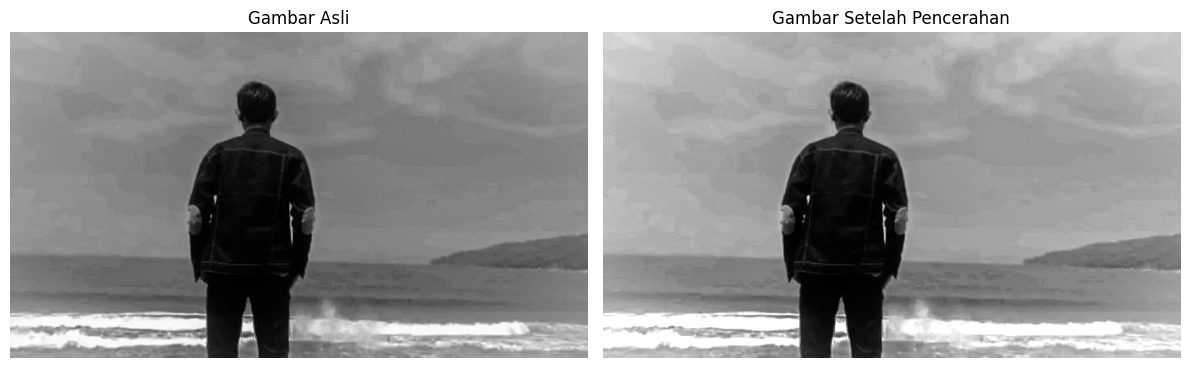

In [2]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Unggah gambar ke Colab
print("Silakan unggah file gambar:")
uploaded = files.upload()

# Ambil nama file yang diunggah
image_path = list(uploaded.keys())[0]

# Membaca citra dalam mode grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dimuat
if image is None:
    print("Citra tidak ditemukan. Periksa kembali path-nya.")
else:
    # Konstanta pencerahan
    brightness_constant = 50

    # Operasi pencerahan dengan clipping
    brightened_image = cv2.add(image, brightness_constant)

    # Visualisasi citra asli dan citra setelah pencerahan
    plt.figure(figsize=(12, 6))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Gambar Asli")
    plt.axis('off')

    # Gambar setelah pencerahan
    plt.subplot(1, 2, 2)
    plt.imshow(brightened_image, cmap='gray')
    plt.title("Gambar Setelah Pencerahan")
    plt.axis('off')

    # Tampilkan semua plot
    plt.tight_layout()
    plt.show()
